# Lectura y balanceo de datos

In [1]:
#Paquetes para lectura y recuento
from sklearn.datasets import load_breast_cancer
import pandas as pd

#Primero importamos los datos que vamos a leer
cancer_data = load_breast_cancer()

#Pasamos los datos a un DataFrame (datos en pandas)
data = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
target = pd.DataFrame(cancer_data['target'],columns = ['Tumor Type'])

#Si quisieramos coger solo unas características
data = data[['mean radius', 'mean texture']] 
data

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [2]:
#Importamos los paquetes de sobremuestreo
from imblearn.over_sampling import SMOTE

#SMOTE
smote = SMOTE()

#Generación de nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(data,target)

#Representación
dataSmote

,mean radius,mean texture
0,17.990000,10.380000
1,20.570000,17.770000
2,19.690000,21.250000
3,11.420000,20.380000
4,20.290000,14.340000
...,...,...
709,17.048589,20.831120
710,13.190055,24.306179
711,15.175921,30.223293
712,17.762731,24.388094


# Entrenamiento y evaluación de modelos

## Regresión logística

=> Traza una linea que divide las clases

=> En este caso, que divido los tumores malignos y benignos

=> Es el que funciona mejor en problemas binarios

c:\Users\karlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


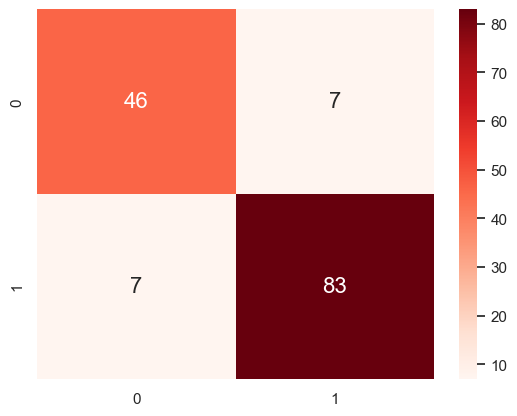

In [4]:
#Importamos los paquetes
from sklearn.linear_model import LogisticRegression

#Los pasos son siempre los mismos
#1. Inicialización.
modelLR = LogisticRegression()

#2. División de datos en conjunto de evaluación y conjunto de entrenamiento
from sklearn.model_selection import train_test_split
dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, random_state = 0)

#3. Entrenamiento del modelo
modelLR.fit(dataTrain, targetTrain)

#4. Predicción con el modelo
targetPred = modelLR.predict(dataTest)

#5. Muestra de resultados
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = confusion_matrix(targetPred, targetTest)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

## Arbol de decisión

=> Traza una serie de preguntas que si se cumplen o no, desemmbocaran en un tipo de tumor o en otro

                    Radio menor < 0.3
                    /               \
        Textura media > 0.13        Maligno
            /           \
        Maligno        Benigno

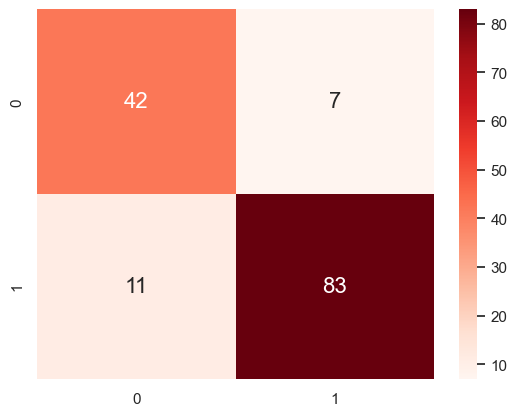

In [5]:
#Importamos los paquetes
from sklearn.tree import DecisionTreeClassifier

#Los pasos son siempre los mismos
#1. Inicialización.
modelDT = DecisionTreeClassifier()

#2. División de datos en conjunto de evaluación y conjunto de entrenamiento
from sklearn.model_selection import train_test_split
dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, random_state = 0)

#3. Entrenamiento del modelo
modelDT.fit(dataTrain, targetTrain)

#4. Predicción con el modelo
targetPred = modelDT.predict(dataTest)

#5. Muestra de resultados
array = confusion_matrix(targetPred, targetTest)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

## Bosque aleatorio

=> Utiliza muchos árboles de decisión

=>  En función de los votos de los diferente árboles, se decide el tipo de tumor

C:\Users\karlo\AppData\Local\Temp\ipykernel_4028\2386943583.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(dataTrain, targetTrain)


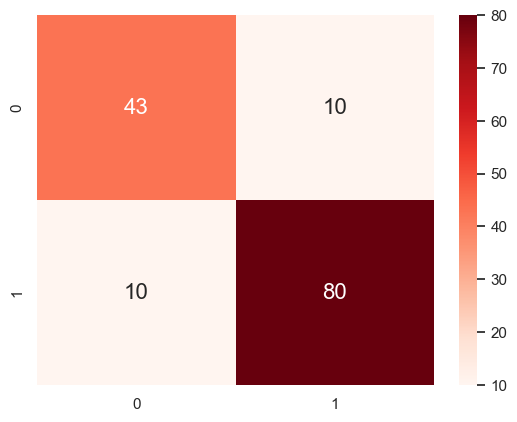

In [6]:
#Importamos los paquetes
from sklearn.ensemble import RandomForestClassifier

#Los pasos son siempre los mismos
#1. Inicialización.
modelRF = RandomForestClassifier()

#2. División de datos en conjunto de evaluación y conjunto de entrenamiento
from sklearn.model_selection import train_test_split
dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, random_state = 0)

#3. Entrenamiento del modelo
modelRF.fit(dataTrain, targetTrain)

#4. Predicción con el modelo
targetPred = modelRF.predict(dataTest)

#5. Muestra de resultados
array = confusion_matrix(targetPred, targetTest)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

## Red neuronal MLP (Multi Layers Perceptron)

=> Seleccionar un montón de características de entrada que iran a la capa de entrada

=> Luego iran a la capa oculta (una a varias)

=> Estas capas ocultas trazaran una serie de operaciones que determinaran en base a las caracteristicas de entrada se tendra un valor maligno o benigno

=> La capa de salida tendría un solo nodo ya que se esta ante un caso de decisión binaria. 

=> Cuando son varias clases, el MLP es la mejor opción

c:\Users\karlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\karlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


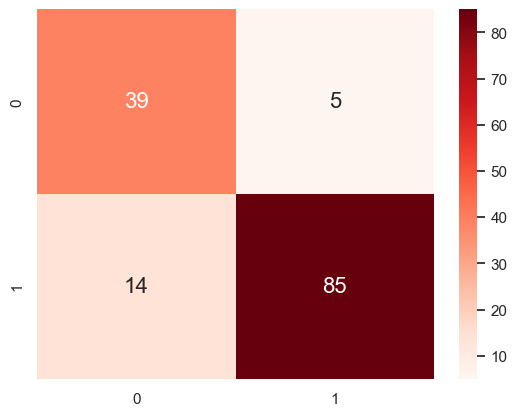

In [7]:
#Importamos los paquetes
from sklearn.neural_network import MLPClassifier

#Los pasos son siempre los mismos
#1. Inicialización.
modelMLP = MLPClassifier()

#2. División de datos en conjunto de evaluación y conjunto de entrenamiento
from sklearn.model_selection import train_test_split
dataTrain, dataTest, targetTrain, targetTest = train_test_split(data,target, random_state = 0)

#3. Entrenamiento del modelo
modelMLP.fit(dataTrain, targetTrain)

#4. Predicción con el modelo
targetPred = modelMLP.predict(dataTest)

#5. Muestra de resultados
array = confusion_matrix(targetPred, targetTest)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

## Almacenamiento de modelos

In [8]:
#Importamos los paquetes
import pickle

#Damos el nombre al fichero
filename = 'modelMLP.model'

#Guardamos el modelo
pickle.dump(modelMLP, open(filename, 'wb'))

In [22]:
#Que luego puede ser recuperado para usarse en otro fichero
modelMLP2 = pickle.load(open('modelMLP.model','rb'))
modelMLP2 == modelMLP